<a href="https://colab.research.google.com/github/renatamontanhana/Kmeans_Agrupamentos_de_Clientes/blob/main/KMEANS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![alt text](https://cienciadosdados.com/images/CINCIA_DOS_DADOS_4.png)
# <font color='GREEN'>Dicas e Truques de Ciência de Dados</font>

# <font color='Blue'>Como o Cientista de Dados pode Usar o K-means para Fazer Segmentação de Clientes  </font>

![](https://media1.giphy.com/media/3o6gbchrcNIt4Ma8Tu/giphy.gif)

![](https://i.pinimg.com/originals/9a/0f/44/9a0f44c76a39fa435fbd44e70ddf0f07.gif)
![](https://1.bp.blogspot.com/-zAaIHHka41w/XyQeJ4HYj9I/AAAAAAAADRI/T0FTUtBh_rgX3KL8s5goN7HzkE6T54IIgCLcBGAsYHQ/s0/trabalho%2Bem%2Bequipe.gif)



In [1]:
# Set-up libraries
import os
import pandas as pd
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder


In [2]:
# Read-in data
df = pd.read_csv('/content/Mall_Customers (1).csv')

In [3]:
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [4]:
# Look at some details
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
# Look at some records
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [6]:
# Check for missing values
df.isna().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [7]:
# Check for duplicate values
df.duplicated().sum()

0

In [8]:
# Look at breakdown of Gender
df['Gender'].value_counts()
sns.countplot(df['Gender'])

ValueError: ignored

<ipython-input-9-1562df584dd2>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Age'])


<Axes: xlabel='Age', ylabel='Density'>

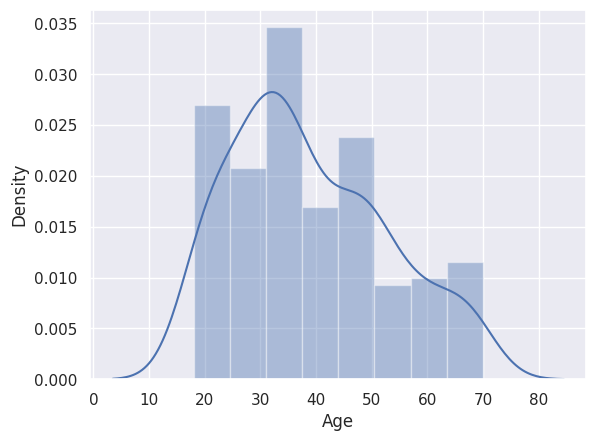

In [9]:
# Look at distribution of Age
sns.distplot(df['Age'])

<ipython-input-10-d3e6b2a834e3>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Annual Income (k$)'])


<Axes: xlabel='Annual Income (k$)', ylabel='Density'>

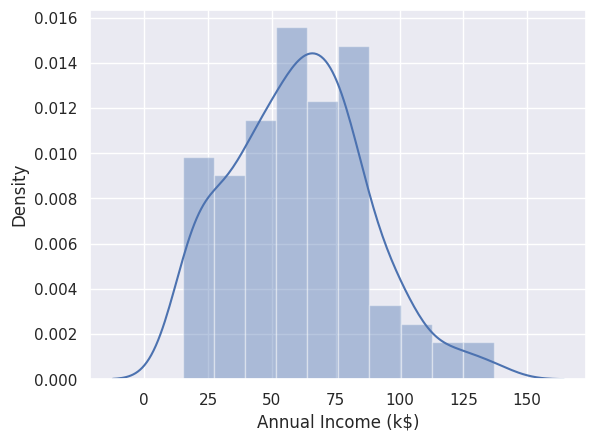

In [10]:
# Look at distribution of Annual Income
sns.distplot(df['Annual Income (k$)'])

<ipython-input-11-7265ad5889f4>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Spending Score (1-100)'])


<Axes: xlabel='Spending Score (1-100)', ylabel='Density'>

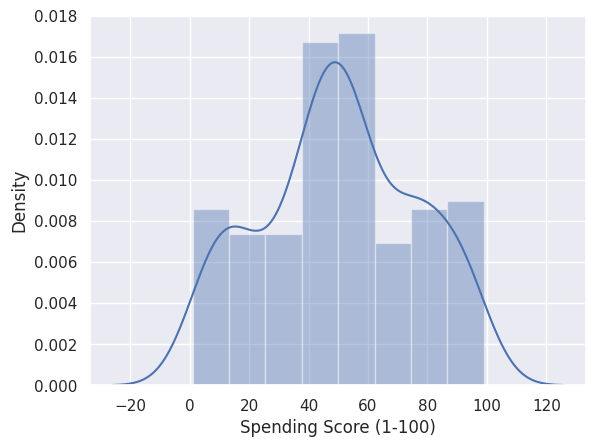

In [11]:
# Look at distribution of Spending
sns.distplot(df['Spending Score (1-100)'])

In [12]:
df.describe()


,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


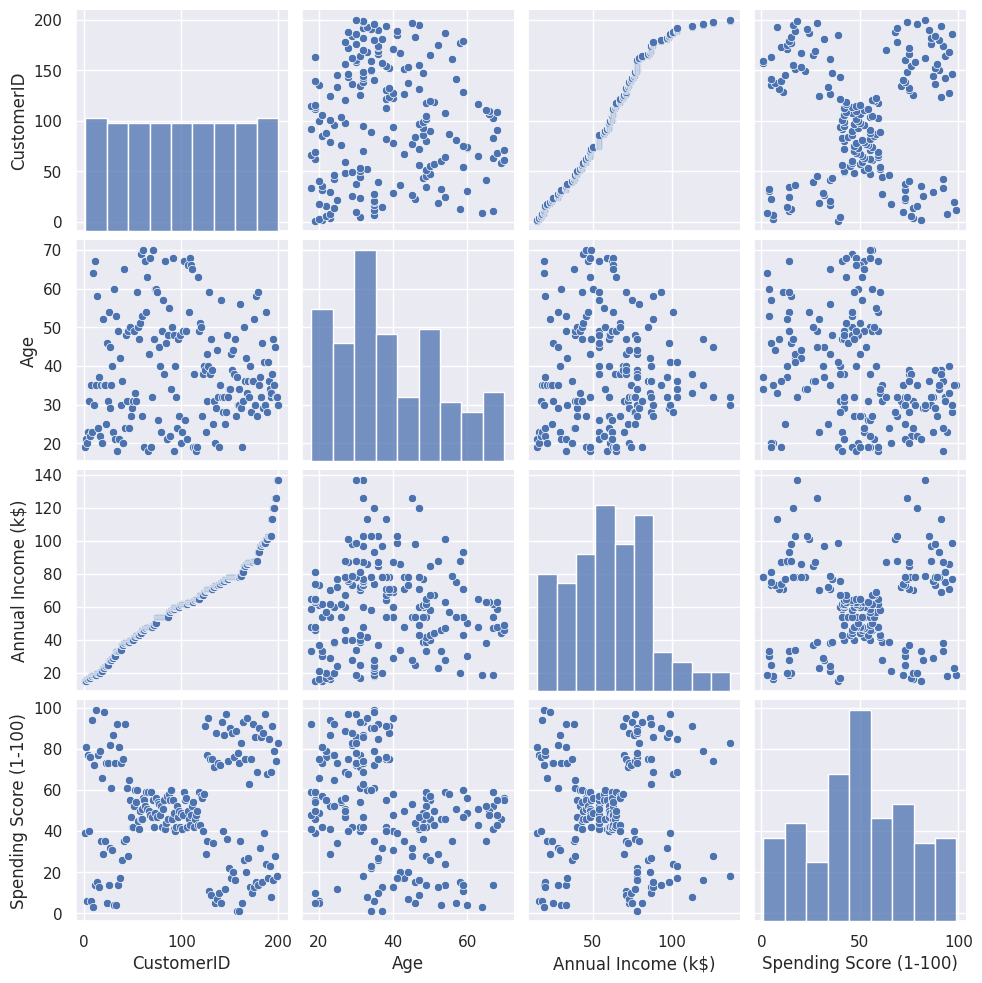

In [13]:
# Explore data visually with scatter plots
sns.pairplot(df)

In [ ]:
# Explore data visually with kernel density estimations
g = sns.PairGrid(df)
g.map_diag(sns.kdeplot)
g.map_offdiag(sns.kdeplot, n_levels=6);

In [ ]:
# Summarise
df.describe()

Etapa 2: pré-processar os dados e entender um pouco mais
Esta etapa normalmente leva mais tempo no ciclo, mas para nossos propósitos, a maioria dos conjuntos de dados escolhidos nesta série são limpos.

Os conjuntos de dados do mundo real são barulhentos e incompletos. As escolhas que fazemos nesta etapa para resolver problemas de dados podem afetar as etapas de recebimento de dados e o próprio resultado. Por exemplo, pode ser complicado lidar com dados ausentes quando não sabemos por que eles estão ausentes. Está faltando completamente ao acaso ou não? Também pode ser complicado abordar valores discrepantes se não compreendermos o domínio e o contexto do problema o suficiente.

In [ ]:
# Rename columns for easier handling
df = df.rename(columns={'Annual Income (k$)': 'Income',
                  'Spending Score (1-100)': 'Spending'
                  })
df.head()

,CustomerID,Gender,Age,Income,Spending
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
# Transform categorical features to numeric
le = LabelEncoder()
le.fit(df['Gender'].drop_duplicates())
df['Gender'] = le.transform(df['Gender'])

In [ ]:
# Look at breakdown of feature Gender
df['Gender'].value_counts()

0    112
1     88
Name: Gender, dtype: int64

In [ ]:
# Get the features for input
X = df.drop('CustomerID', axis=1)
X.head()

,Gender,Age,Income,Spending
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


Etapa 3: Modelar e avaliar Precisamos criar vários modelos com diferentes valores de k, medir o desempenho de cada modelo e usar k com o melhor desempenho em nosso modelo final.

Onde a verdade básica está disponível, comparamos os agrupamentos gerados aos da verdade básica.

A inércia não é uma métrica normalizada: apenas sabemos que valores mais baixos são melhores e zero é o ideal.

A primeira etapa escolhe os centróides iniciais, com o método mais básico sendo escolher amostras do conjunto de dados . Após a inicialização, o K-means consiste em fazer um loop entre as duas outras etapas. A primeira etapa atribui cada amostra ao seu centróide mais próximo. A segunda etapa cria novos centróides tomando o valor médio de todas as amostras atribuídas a cada centróide anterior. A diferença entre o antigo e o novo centróide é calculada e o algoritmo repete essas duas últimas etapas até que esse valor seja menor que um limite. Em outras palavras, ele se repete até que os centróides não se movam significativamente.

https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html?highlight=kmeans#sklearn.cluster.KMeans

In [ ]:
# Build and fit models
wcss_scores = []
iterations = list(range(1,10))

for k in iterations:
    model = KMeans(n_clusters=k)
    model.fit(X)
   # model.fit(X)
    wcss_scores.append(model.inertia_)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


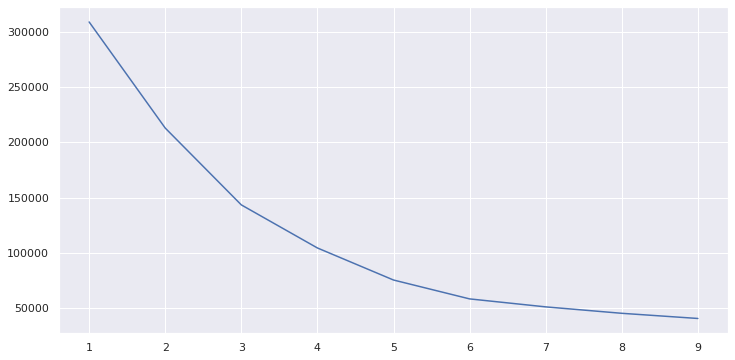

In [ ]:
# Plot performances
plt.figure(figsize=(12,6))
sns.lineplot(iterations, wcss_scores)

Existem quedas em 2, 3, 4 e 5. Vamos plotar alguns recursos e ver o que está acontecendo.

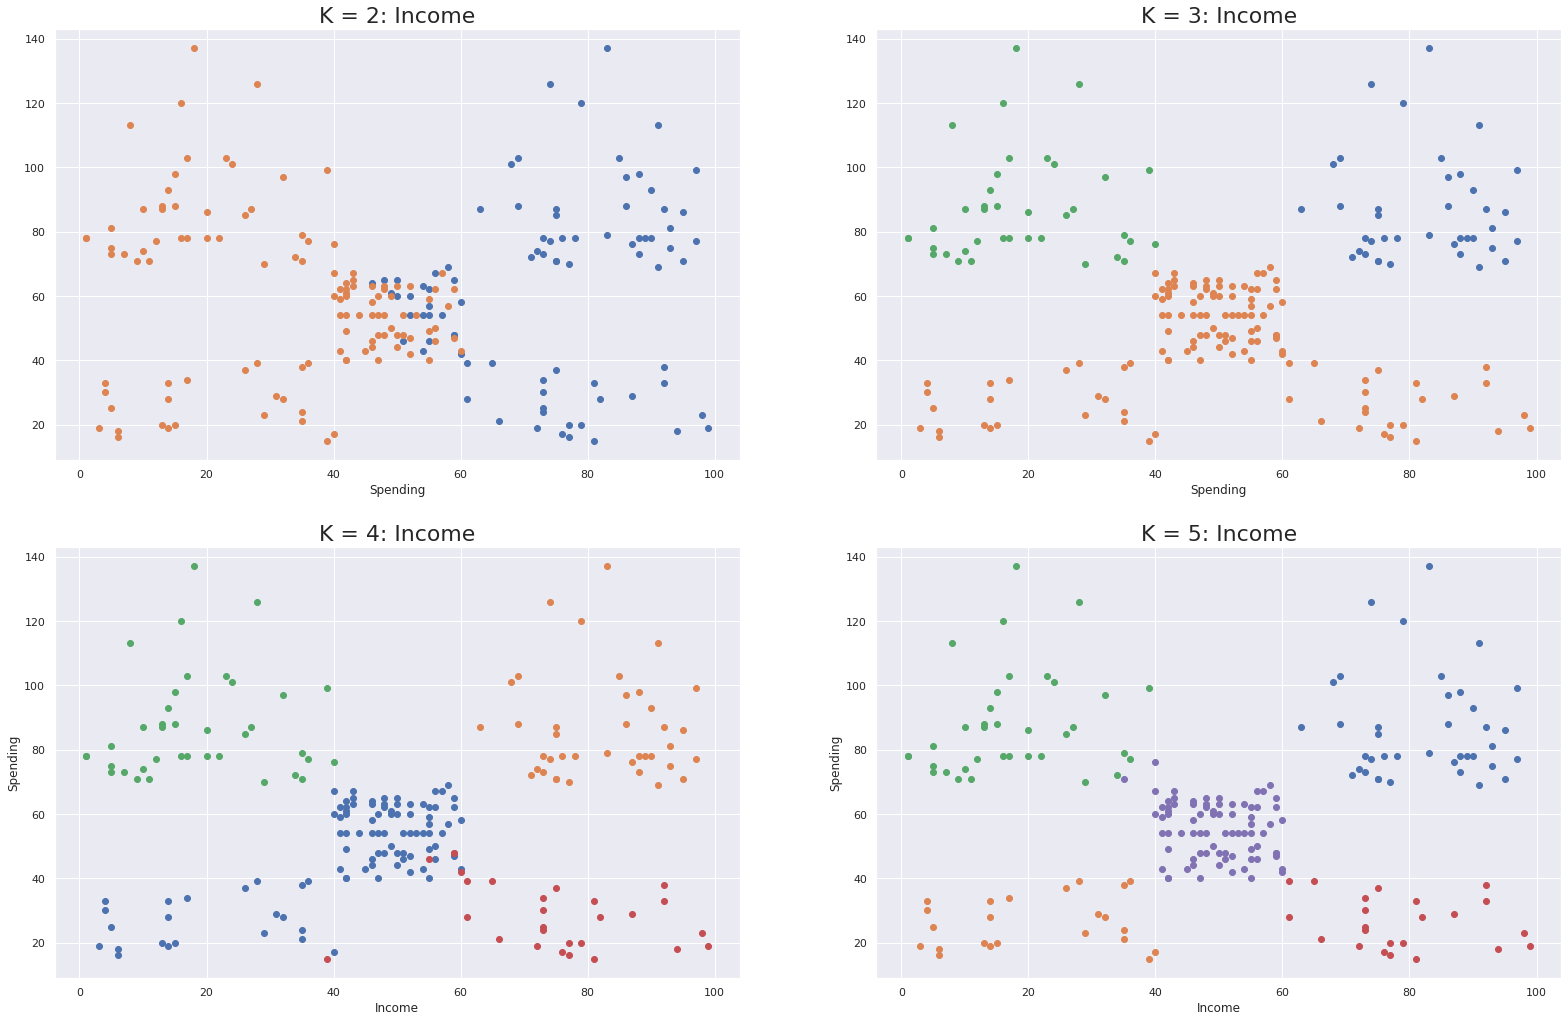

In [ ]:
# Visualise the clusters, considering Income and Spending
plt.figure(figsize=(27,27))

plt.subplot(3,2,1)
plt.title('K = 2: Income',fontsize=22)
plt.xlabel('Income')
plt.xlabel('Spending')
model = KMeans(n_clusters=2)
X['labels'] = model.fit_predict(X)
plt.scatter(X.Spending[X.labels == 0], X.Income[X.labels == 0])
plt.scatter(X.Spending[X.labels == 1], X.Income[X.labels == 1])

plt.subplot(3,2,2)
plt.title('K = 3: Income',fontsize=22)
plt.xlabel('Income')
plt.xlabel('Spending')
model = KMeans(n_clusters=3)
X['labels'] = model.fit_predict(X)
plt.scatter(X.Spending[X.labels == 0], X.Income[X.labels == 0])
plt.scatter(X.Spending[X.labels == 1], X.Income[X.labels == 1])
plt.scatter(X.Spending[X.labels == 2], X.Income[X.labels == 2])

plt.subplot(3, 2, 3)
plt.title('K = 4: Income', fontsize=22)
plt.xlabel('Income')
plt.ylabel('Spending')
model = KMeans(n_clusters=4)
X['labels'] = model.fit_predict(X)
plt.scatter(X.Spending[X.labels == 0], X.Income[X.labels == 0])
plt.scatter(X.Spending[X.labels == 1], X.Income[X.labels == 1])
plt.scatter(X.Spending[X.labels == 2], X.Income[X.labels == 2])
plt.scatter(X.Spending[X.labels == 3], X.Income[X.labels == 3])

plt.subplot(3, 2, 4)
plt.title('K = 5: Income', fontsize=22)
plt.xlabel('Income')
plt.ylabel('Spending')
model = KMeans(n_clusters=5)
X['labels'] = model.fit_predict(X)
plt.scatter(X.Spending[X.labels == 0], X.Income[X.labels == 0])
plt.scatter(X.Spending[X.labels == 1], X.Income[X.labels == 1])
plt.scatter(X.Spending[X.labels == 2], X.Income[X.labels == 2])
plt.scatter(X.Spending[X.labels == 3], X.Income[X.labels == 3])
plt.scatter(X.Spending[X.labels == 4], X.Income[X.labels == 4])

K = 5 é curioso, pois podemos ver facilmente cinco agrupamentos nesses gráficos. Vamos dar uma olhada mais de perto em k = 5.

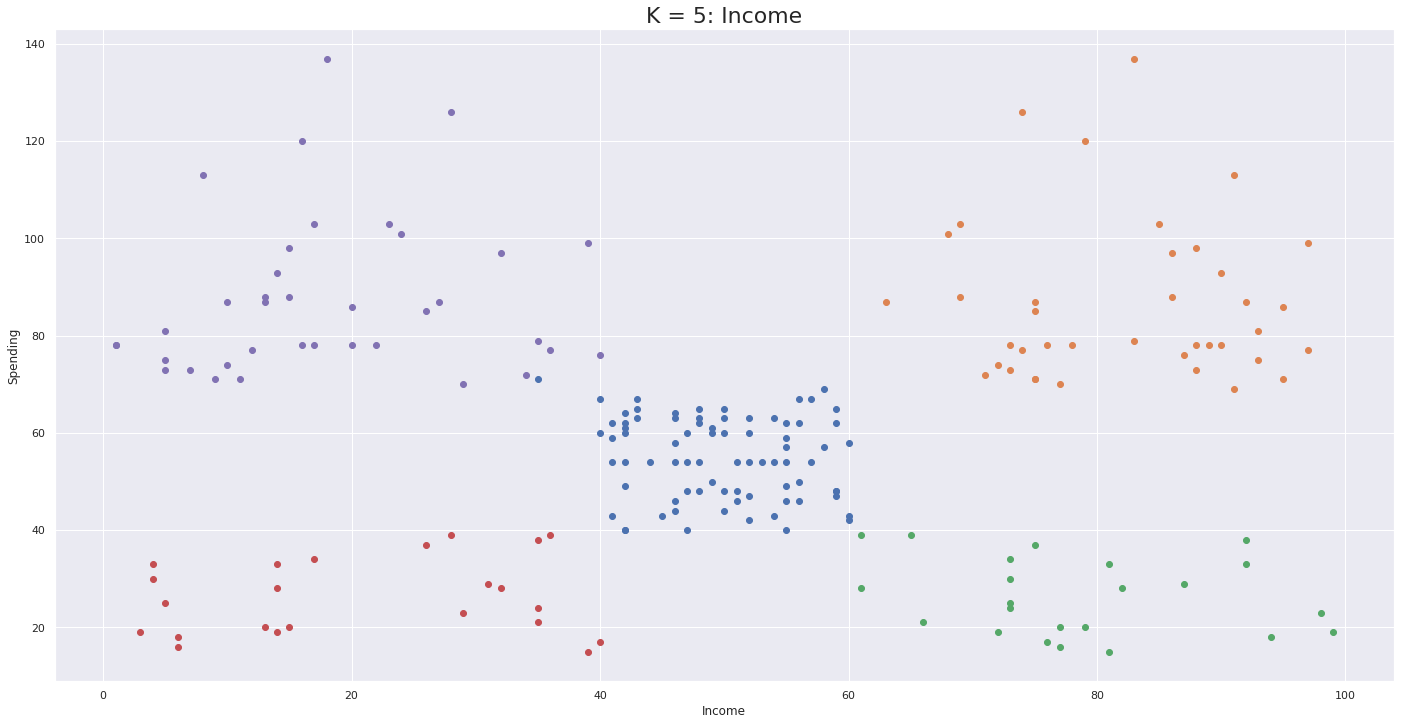

In [ ]:
# Visualise most interesting clusters
plt.figure(figsize=(24,12))

plt.title('K = 5: Income', fontsize=22)
plt.xlabel('Income')
plt.ylabel('Spending')
model = KMeans(n_clusters=5)
X['labels'] = model.fit_predict(X)
plt.scatter(X.Spending[X.labels == 0], X.Income[X.labels == 0])
plt.scatter(X.Spending[X.labels == 1], X.Income[X.labels == 1])
plt.scatter(X.Spending[X.labels == 2], X.Income[X.labels == 2])
plt.scatter(X.Spending[X.labels == 3], X.Income[X.labels == 3])
plt.scatter(X.Spending[X.labels == 4], X.Income[X.labels == 4])

Acontece que existem cinco grupos interessantes com base na renda anual de um cliente e na pontuação de gastos.

Pessoas de baixa renda e baixos gastos. O primeiro cluster é formado por clientes de baixa renda e baixos gastos.

Pessoas de baixa renda e grandes gastadores. O segundo cluster é formado por clientes de baixa renda e altos gastos.

Renda média, gastadores médios. O terceiro cluster é formado por clientes com renda média e gastos médios.

Pessoas de alta renda e baixos gastos. O quarto cluster é formado por clientes de alta renda e baixos gastos.

Pessoas de alta renda e grandes gastadores. O quinto cluster é formado por clientes com alta renda e altos gastos.

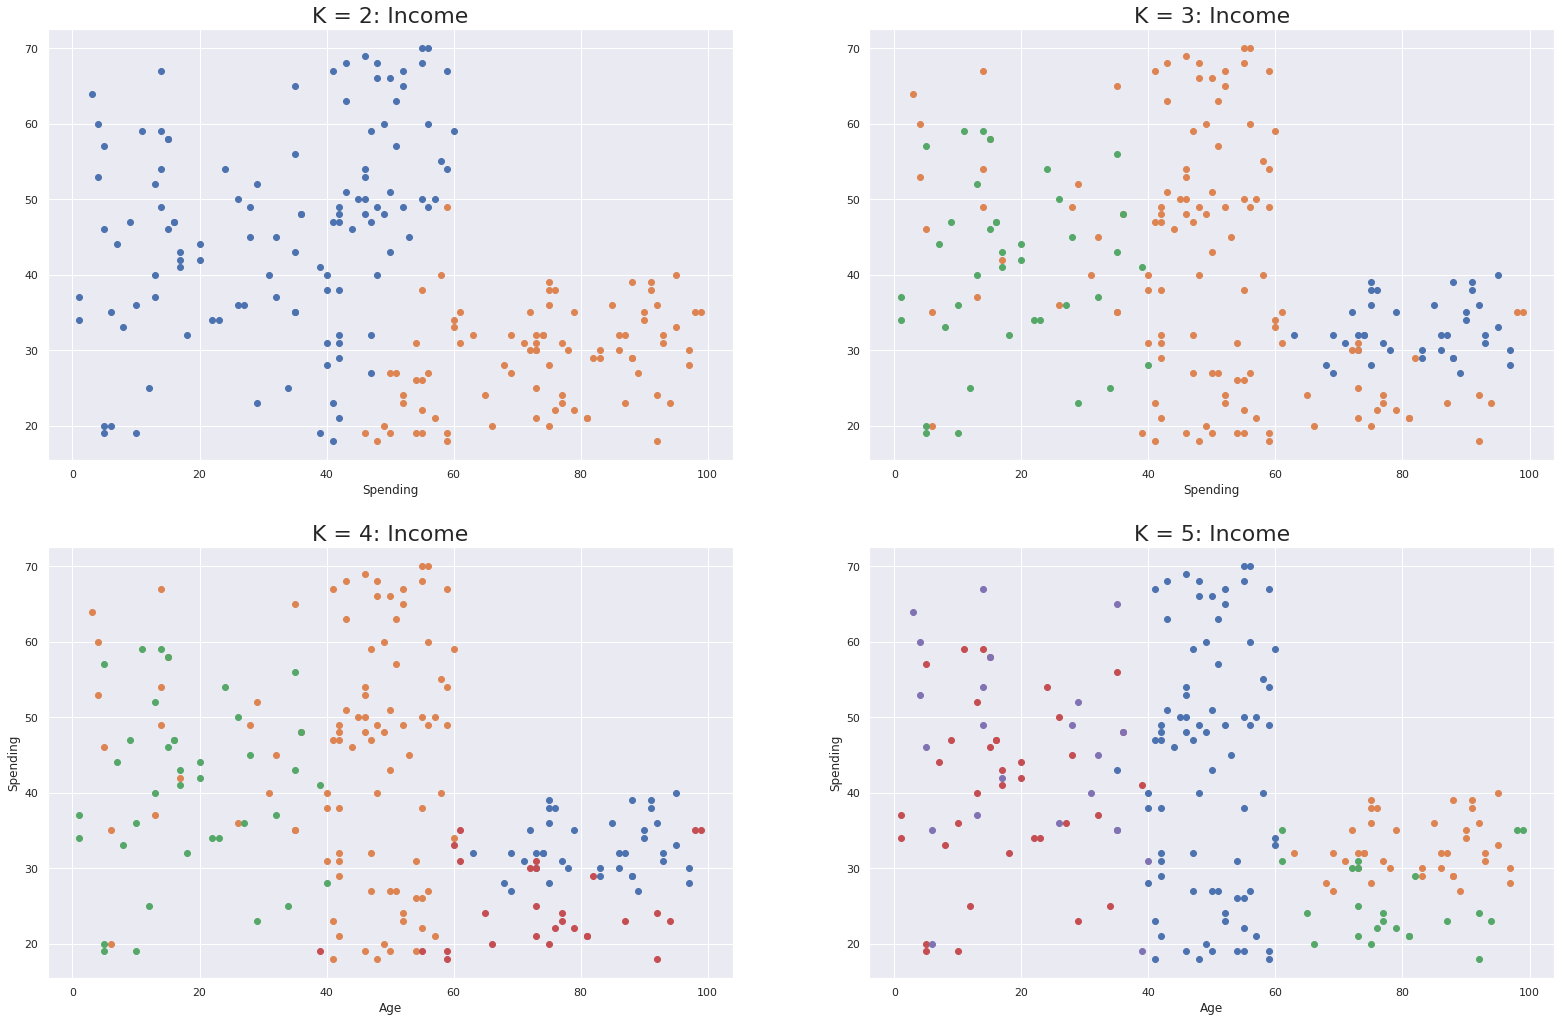

In [ ]:
# Visualise the clusters, considering Age and Spending
plt.figure(figsize=(27,27))

plt.subplot(3,2,1)
plt.title('K = 2: Income',fontsize=22)
plt.xlabel('Age')
plt.xlabel('Spending')
model = KMeans(n_clusters=2)
X['labels'] = model.fit_predict(X)
plt.scatter(X.Spending[X.labels == 0], X.Age[X.labels == 0])
plt.scatter(X.Spending[X.labels == 1], X.Age[X.labels == 1])

plt.subplot(3,2,2)
plt.title('K = 3: Income',fontsize=22)
plt.xlabel('Age')
plt.xlabel('Spending')
model = KMeans(n_clusters=3)
X['labels'] = model.fit_predict(X)
plt.scatter(X.Spending[X.labels == 0], X.Age[X.labels == 0])
plt.scatter(X.Spending[X.labels == 1], X.Age[X.labels == 1])
plt.scatter(X.Spending[X.labels == 2], X.Age[X.labels == 2])

plt.subplot(3, 2, 3)
plt.title('K = 4: Income', fontsize=22)
plt.xlabel('Age')
plt.ylabel('Spending')
model = KMeans(n_clusters=4)
X['labels'] = model.fit_predict(X)
plt.scatter(X.Spending[X.labels == 0], X.Age[X.labels == 0])
plt.scatter(X.Spending[X.labels == 1], X.Age[X.labels == 1])
plt.scatter(X.Spending[X.labels == 2], X.Age[X.labels == 2])
plt.scatter(X.Spending[X.labels == 3], X.Age[X.labels == 3])

plt.subplot(3, 2, 4)
plt.title('K = 5: Income', fontsize=22)
plt.xlabel('Age')
plt.ylabel('Spending')
model = KMeans(n_clusters=5)
X['labels'] = model.fit_predict(X)
plt.scatter(X.Spending[X.labels == 0], X.Age[X.labels == 0])
plt.scatter(X.Spending[X.labels == 1], X.Age[X.labels == 1])
plt.scatter(X.Spending[X.labels == 2], X.Age[X.labels == 2])
plt.scatter(X.Spending[X.labels == 3], X.Age[X.labels == 3])
plt.scatter(X.Spending[X.labels == 4], X.Age[X.labels == 4])

K = 2 é curioso, pois podemos ver de alguma forma 2 agrupamentos nesses gráficos. Vamos dar uma olhada mais de perto em k = 2.

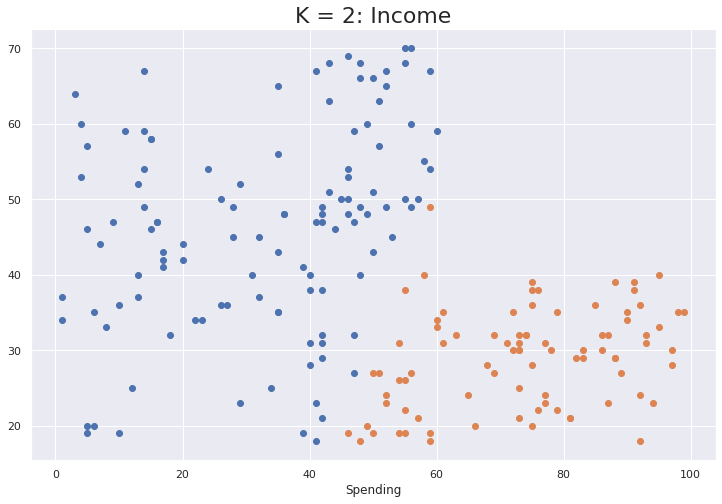

In [ ]:
# Visualise interesting clusters
plt.figure(figsize=(27,27))

plt.subplot(3,2,1)
plt.title('K = 2: Income',fontsize=22)
plt.xlabel('Age')
plt.xlabel('Spending')
model = KMeans(n_clusters=2)
X['labels'] = model.fit_predict(X)
plt.scatter(X.Spending[X.labels == 0], X.Age[X.labels == 0])
plt.scatter(X.Spending[X.labels == 1], X.Age[X.labels == 1])

Acontece que existem dois grupos interessantes com base na idade de um cliente e na pontuação de gastos.

Gastadores jovens e de meia-idade. Um cluster é composto de clientes jovens a de meia idade que gastam muito.

Gastadores jovens e de meia-idade. O outro cluster é composto por todos os outros clientes com gastos baixos a médios.

Os gastadores de jovens a meia-idade podem representar um grande grupo demográfico a ser atingido.


### FIM

**Kmeans - Caso Prático**:
https://www.youtube.com/watch?v=PL7ehge24Ak

### # Onde me Encontrar - Ciência dos Dados <a href="https://linktr.ee/cienciadosdados">https://linktr.ee/cienciadosdados</a>

In [ ]:
from IPython.core.display import HTML
HTML('<iframe width="700" height="498" src="https://www.youtube.com/embed/Wq-n7ZPce8k" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>')